In [1]:
! pip3 install POT

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import wasserstein_distance as wd
import ot
import torch
from torch import nn, optim
from lib.collision_wrapper import find_OT_collision as newot

rng = np.random.seed(0)
size = 7;
cm = 0.393701; #inches
markers = ["o", "s", "<", ">", "d", "+"]

In [82]:
Np = 1000
X0 = 0.5

def drift(x):
    return -x**3

T = 1.0
Ntc = 100
Ntf= 1000

Npf = 1000
Npc = 100000

Xf = X0*np.ones(Npf)
Xc = X0*np.ones(Npc)
Xref = X0*np.ones(Npc)

dt = T/Ntc
for nt in range(Ntc):
    Xc = Xc + drift(Xc)*dt + np.sqrt(2.*dt)*np.random.normal(0,1,Xc.shape)
    
dt = T/Ntf
for nt in range(Ntf):
    Xf = Xf + drift(Xf)*dt + np.sqrt(2.*dt)*np.random.normal(0,1,Xf.shape)

dt = T/Ntf
for nt in range(Ntf):
    Xref = Xref + drift(Xref)*dt + np.sqrt(2.*dt)*np.random.normal(0,1,Xref.shape)

Xf0 = Xf.copy()
Xc0 = Xc.copy()


0.1496455558300042
0.16121289789579982
0.1480045371832081


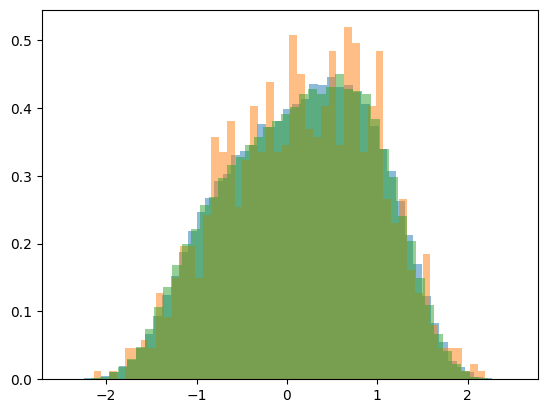

In [86]:
plt.figure()

_ = plt.hist(Xc,bins=50,density=True, alpha=0.5)
_ = plt.hist(Xf,bins=50,density=True, alpha=0.5)
_ = plt.hist(Xref,bins=50,density=True, alpha=0.5)


print(np.mean(Xc))
print(np.mean(Xf))
print(np.mean(Xref))

E[Xc] + E[Xf-Xc] 0.13686675629156625


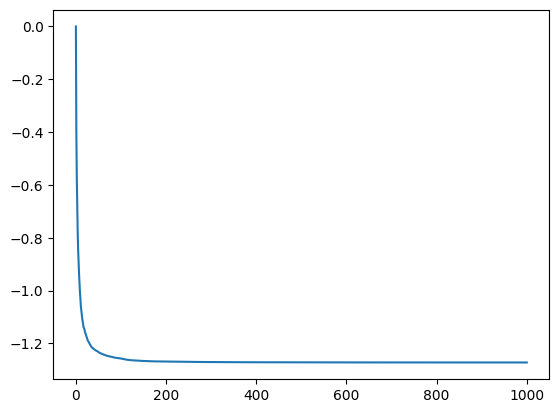

In [87]:
rem = 0
plt.figure()
for k in range(1, 2):
    Xc = Xc0.copy()
    Xf = Xf0.copy()
    
    #idx = np.random.choice([i for i in range(Npc)], Npf, replace=False)
    idx = [i for i in range(Npf)]
    Xt = np.concatenate([Xf[None,:],Xc[None,idx]], axis=0)[:,:,None]
    Xt, dists_coll, nt = newot(Xt, MinIter=1000, MaxIter=1000, tol = 1e-9, avg_window=50, Track=0, bi=1)
    
    rem += np.mean(Xt[0,:,0]-Xt[1,:,0])
    
    print("E[Xc] + E[Xf-Xc]", np.mean(Xc) + rem/k)
    
    plt.plot(dists_coll)

In [69]:
np.mean(Xt[0,:,0]-Xt[1,:,0])

-0.02338637110725021

In [85]:
print("E[Xc]", np.mean(Xc))
print("E[Xf]", np.mean(Xf))
print("E[Xref]", np.mean(Xref))

print("E[Xc] + E[Xf-Xc]", np.mean(Xc) + np.mean(Xt[0,:,0]-Xt[1,:,0]))

E[Xc] 0.1496455558300042
E[Xf] 0.16121289789579982
E[Xref] 0.1480045371832081
E[Xc] + E[Xf-Xc] 0.13686675629156625
